In [1]:
import os
!pip install seaborn   ## install seaborn package 
import seaborn as sns  ## import seaborn package
import matplotlib.pyplot as plt ## import matplotlib package
# Set the working directory
os.chdir('/Users/giorgiocavallo/Desktop/Python/coursera/IBM_data_analysis')

# Get and print the new current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")  ## f is used to format the string


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Current working directory: /Users/giorgiocavallo/Desktop/Python/coursera/IBM_data_analysis


In [2]:
## read the csv data
import pandas as pd
df = pd.read_csv('automobile.csv')
print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [3]:
# Install scikit-learn directly from the notebook
!pip install scikit-learn

## Importing the libraries: import linear_model from sklearn
from sklearn.linear_model import LinearRegression
## Creating an object of the class LinearRegression and storing it in a variable lm
lm=LinearRegression()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
## define the predictor and target variables
## predictor variable
# Drop rows where either X or Y has NaN values
df_cleaned = df[['highway-mpg', 'price']].dropna()

# Define X and Y again after dropping NaNs
X = df_cleaned[['highway-mpg']]
Y = df_cleaned['price']

# Fit the model
lm.fit(X, Y)

## predict the target variable
Yhat=lm.predict(X)
## It outputs an array (or a pandas Series) of predicted prices

print(Yhat[0:5])


print(X.head())
print(Y.head())
print(lm.intercept_) ## print the intercept
print(lm.coef_)     ## print the coefficient


[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
   highway-mpg
0           27
1           27
2           26
3           30
4           22
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
38423.3058581574
[-821.73337832]


In [5]:
# Drop rows with NaN values from all predictor and target columns
df_cleaned = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']].dropna()

# Create the predictor matrix Z using the selected columns
Z = df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Fit the model using Z as predictors and 'price' as the target
lm.fit(Z, df_cleaned['price'])

print(lm.intercept_) ## print the intercept
print(lm.coef_)     ## print the coefficient

## can you show me the estimated linear model with intercept and coefficients?
## Yhat= a + b1X1 + b2X2 + b3X3 + b4X4
## price = a + b1*horsepower + b2*curb-weight + b3*engine-size + b4*highway-mpg



-15700.57397903931
[53.27878556  4.66217408 82.22948394 35.5175845 ]


In [6]:
## Model Evaluation using Visualization

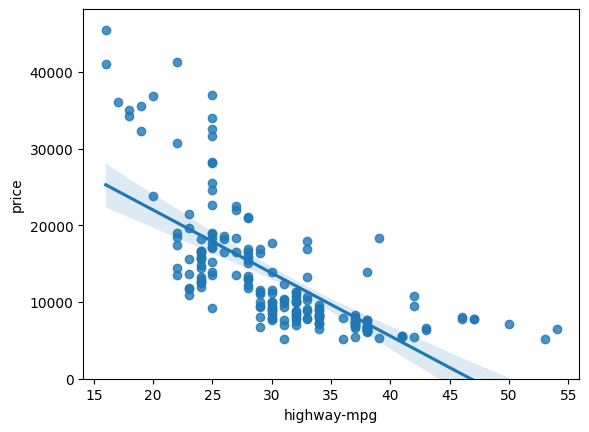

In [7]:
## Regression Plot

sns.regplot(x='highway-mpg', y='price', data=df)    ## plot the regression plot
plt.ylim(0,)  ## set the y-axis limit
plt.show()


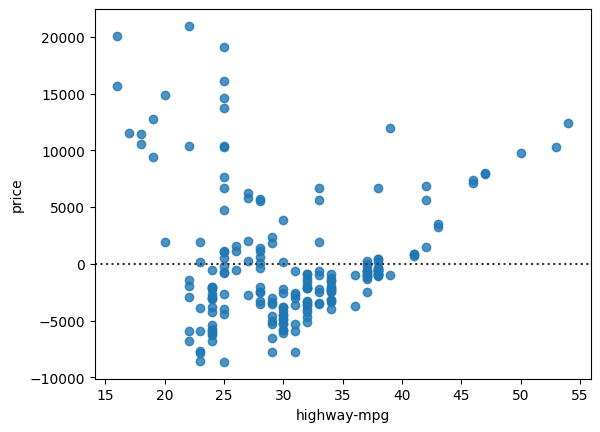

In [8]:
import seaborn as sns

## Residual Plot what is the residual plot? 
## The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).
## The residual plot represents the error between the actual value.

# Use keyword arguments x and y instead of positional arguments
sns.residplot(x='highway-mpg', y='price', data=df)  ## plot the residual plot
plt.show()

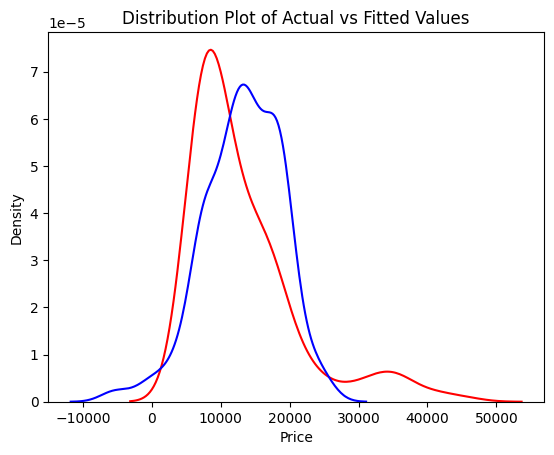

In [9]:
## Distribution Plot
## What is the distribution plot?
## The distribution plot shows the distribution of the predicted values (Yhat).
## The distribution plot is used to visualize the fit of the model.

# Create the distribution plot using kdeplot
ax1 = sns.kdeplot(data=df['price'], color="r", label="Actual Value") ## plot the actual value
sns.kdeplot(data=Yhat, color="b", label="Fitted Values", ax=ax1) ## plot the fitted value

# Add title and labels
plt.title('Distribution Plot of Actual vs Fitted Values')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()

## Polynomial Regression and Pipelines

In [10]:
import numpy as np

# Use the existing variables from previous cells to define x and y
x = X['highway-mpg'].values
y = Y.values

## what is polynomial regression?
## Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

## third order polynomial model

# Create third order polynomial model
f = np.polyfit(x, y, 3)  # fit the polynomial model with degree 3
p = np.poly1d(f)  # create the polynomial function

# Print the polynomial function
print(p)



        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [11]:
## Polynomial Regression  with more than one dimension


from sklearn.preprocessing import PolynomialFeatures ## import PolynomialFeatures from sklearn.preprocessing
pr=PolynomialFeatures(degree=2, include_bias= False) ## create an object of PolynomialFeatures with degree 2
x_polly=pr.fit_transform(Z[['horsepower', 'curb-weight']]) ## fit and transform the predictor variable X


## print the transformed variable 
print(x_polly[0:5])

## print the feature names of the transformed variable 
print(pr.get_feature_names_out(['horsepower', 'curb-weight']))



[[1.110000e+02 2.548000e+03 1.232100e+04 2.828280e+05 6.492304e+06]
 [1.110000e+02 2.548000e+03 1.232100e+04 2.828280e+05 6.492304e+06]
 [1.540000e+02 2.823000e+03 2.371600e+04 4.347420e+05 7.969329e+06]
 [1.020000e+02 2.337000e+03 1.040400e+04 2.383740e+05 5.461569e+06]
 [1.150000e+02 2.824000e+03 1.322500e+04 3.247600e+05 7.974976e+06]]
['horsepower' 'curb-weight' 'horsepower^2' 'horsepower curb-weight'
 'curb-weight^2']


In [12]:
## Normalize each feature simultaneously so that each feature will have a mean of 0 and a standard deviation of 1.
## This is done by subtracting the mean of each feature from the dataset and then dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler ## import StandardScaler from sklearn.preprocessing
SCALE = StandardScaler() ## create an object of StandardScaler
SCALE.fit(Z[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) ## fit the object with the predictor variables
X_SCALE = SCALE.transform(Z[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) ## transform the predictor variables

## print the transformed variable
print(X_SCALE[0:5])

## print the mean and standard deviation of the transformed variable
print("Means after scaling:", np.mean(X_SCALE, axis=0))
print("Standard Deviation after scaling:", np.std(X_SCALE, axis=0))



[[ 0.20296699 -0.01548585  0.07625546 -0.53912772]
 [ 0.20296699 -0.01548585  0.07625546 -0.53912772]
 [ 1.35087746  0.51484142  0.60449348 -0.68549391]
 [-0.03729334 -0.4223915  -0.42797173 -0.10002915]
 [ 0.30974936  0.51676988  0.22032038 -1.27095866]]
Means after scaling: [9.81905791e-17 9.81905791e-17 4.24004773e-17 2.23160407e-16]
Standard Deviation after scaling: [1. 1. 1. 1.]


In [13]:
## Pipelines
## What is a pipeline?
## A pipeline is a way to simplify your code. It bundles the data preprocessing and model into a single object.
## The pipeline object takes a list of tuples as an argument. Each tuple contains a name and an object.
## The first element of the tuple is the name of the model, and the second element is the model object.


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## create a list of tuple with the name of the model and the model constructor
Input=[('polynomial',PolynomialFeatures(degree=2)), ('scale', StandardScaler()), ('model',LinearRegression())]

# Check NaN values in relevant columns
print("Missing values in relevant columns:")
print(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']].isnull().sum())

# Clean the data by removing rows with NaN values
df_cleaned = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']].dropna()

##input the list in the pipeline constructor
pipe=Pipeline(Input)
print(pipe)

##train the pipeline object
pipe.fit(df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df_cleaned['price'])
Yhat = pipe.predict(df_cleaned[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(Yhat[0:4]) ## these numbers represent the predicted car prices of the first 4 rows based on the input features.

## Raw Data ➔ PolynomialFeatures ➔ StandardScaler ➔ LinearRegression ➔ Predicted Prices





Missing values in relevant columns:
horsepower     2
curb-weight    0
engine-size    0
highway-mpg    0
price          4
dtype: int64
Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('model', LinearRegression())])
[13139.52833211 13139.52833211 18274.67859543 10428.86200312]


In [14]:
## Measures for In sample Evaluation
## What is in-sample evaluation?
## In-sample evaluation is the evaluation of the model on the same data that was used to train the model.
## In-sample evaluation is not a good measure of how well the model will perform on new data.
## In-sample evaluation is used to understand how well the model fits the data.

from sklearn.metrics import mean_squared_error ## import mean_squared_error from sklearn.metrics
#mean_squared_error(df_cleaned['price'], Y_predict_simple_fit) ## calculate the mean squared error

X = df_cleaned[['highway-mpg']]
Y = df_cleaned['price']

lm.fit(X, Y)
lm.score(X, Y) ## calculate the R^2 value
## 49 % of the variation of the price is explained by the highway-mpg variable.



0.497349156029669

## Predictions and decision making

In [ ]:
## do the predicted values make sense?
## first we train the model
# Drop rows where either price or highway-mpg is NaN
df_clean = df[['highway-mpg', 'price']].dropna()

# Create your X and y variables from the clean dataset
X = df_clean[['highway-mpg']]  # Feature
y = df_clean['price']         # Target

# Fit the model
lm.fit(X, y)

## let's predict the price of a car with a highway-mpg of 30
# Reshape the input value into a 2D array
prediction_input = np.array([[30.0]])  # Create a 2D array with a single value
predicted_price = lm.predict(prediction_input)

print(predicted_price)

print(f"Predicted price for a car with highway-mpg of 30: ${predicted_price[0]:.2f}") ## f is used to format the string to 2 decimal places and $ sign in front of the number.  




[13771.3045085]
Predicted price for a car with highway-mpg of 30: $13771.30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
